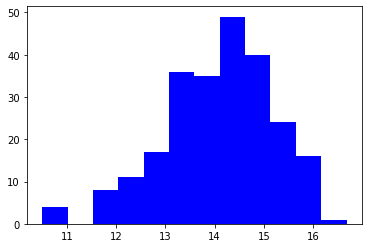

[ 4.  0.  8. 11. 17. 36. 35. 49. 40. 24. 16.  1.]
[10.5   11.015 11.53  12.045 12.56  13.075 13.59  14.105 14.62  15.135
 15.65  16.165 16.68 ]

SF count:  241.0


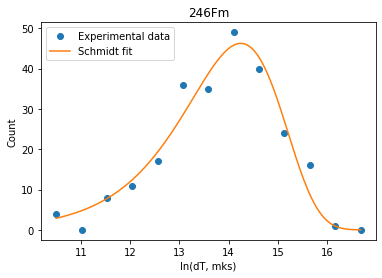

Lambda:  6.483824708231729e-07
n0:  125.69831441230758
n0 / bin_size:  244.0743969171021
Cov:  [[1.79426688e-15 2.11142633e-10]
 [2.11142633e-10 3.36955928e+01]]
Max:  14.248785081961167
T1/2, mks:  1542299.560829306
ErrT1/2+, mks:  94579.4660652508
ErrT1/2-, mks:  -107800.96752853924


In [13]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

# Schmidt fit
# Eur.Phys.J.A(2000)8:141-145 https://link.springer.com/content/pdf/10.1007/s100500070129.pdf
# Z.Phys.A-AtomsandNuclei316,19-26(1984) https://link.springer.com/content/pdf/10.1007/BF01415656.pdf

times_mks = np.array([36524,43330,52955,54271,113700,121933,134890,144682,148865,155592,161577,164368,181860,188046,196222,202754,226749,242346,249782,258321,270012,271440,281185,296368,299862,300615,312508,315593,336648,370767,383361,389309,389374,397739,398456,439250,442057,452550,457111,472086,519749,520160,542842,543900,547212,560199,568640,569050,569147,572258,595751,605581,608221,611537,635777,641818,651118,657705,659498,680663,686695,687737,691133,693151,695360,704195,714467,718245,729140,734282,739135,765680,770597,776670,791079,791281,830004,831423,835344,845631,855774,857804,857904,863115,875960,923219,940752,942173,969721,1018440,1021543,1040264,1060258,1070730,1076474,1094055,1095854,1102891,1136800,1147042,1147673,1165807,1175543,1205504,1207641,1229477,1250520,1258926,1266665,1296905,1304362,1354650,1360761,1393567,1422586,1431506,1479266,1479526,1482457,1501297,1512793,1533997,1541311,1552652,1563604,1567138,1572885,1576942,1578327,1640067,1662965,1667516,1670049,1710858,1719173,1725737,1745768,1748321,1787256,1849912,1853142,1867721,1881474,1910925,1916142,1919874,1942862,1950481,1967640,1996480,2015704,2048657,2083599,2084615,2085931,2105196,2115017,2130587,2145883,2148011,2298455,2347357,2369465,2390119,2416033,2419264,2425118,2454562,2521371,2552969,2560871,2567412,2597955,2612767,2622625,2636111,2647522,2745674,2820435,2824437,2996424,3076704,3115273,3132292,3139743,3168477,3187822,3221185,3312057,3326916,3331568,3387556,3390452,3457284,3475049,3580176,3595842,3650872,3653864,3713670,3809895,3925729,3937794,4214167,4334842,4421457,4498298,4510073,4514450,4534601,4561777,4585058,4713642,4943106,5227989,5289596,5305289,5430871,5691595,5717184,6066155,6098794,6108638,6189890,6325792,6835412,7194571,7214873,7252567,7336119,7679297,7751308,7975117,7995507,8415301,8751986,8909050,9075407,9080368,9714142,10657174])
times_ln = np.log(times_mks)
bin_size = 0.515
counts, bins, bars = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=bin_size), color='blue')
plt.show()
print(counts)
print(bins)

x = bins
y = np.append(counts, 0)

sf = np.sum(y)
print("\nSF count: ", sf)
n0_approx = sf * bin_size
lam_approx = 6.4935e-07

def func(x, lam, n0):
    return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam)))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def fit_param_errors(pcov_matrix):
    return np.sqrt(np.diag(pcov_matrix))

popt, pcov = optimize.curve_fit(func, x, y, [lam_approx, n0_approx])

x_cont = np.arange(x.min(), x.max(), 0.01)

plt.plot(x, y, "o", label='Experimental data')
plt.plot(x_cont, func(x_cont, *popt), label='Schmidt fit')
# plt.plot(x_cont, func(x_cont, lam_approx, n0_approx), label='Schmidt distr. for known T1/2')
plt.legend()
plt.title('246Fm')
plt.xlabel('ln(dT, mks)')
plt.ylabel('Count')
plt.show()

print("Lambda: ", popt[0])
print("n0: ", popt[1])
print("n0 / bin_size: ", popt[1]/bin_size)
print("Cov: ", pcov)
hl = 1/popt[0]
print("Max: ", np.log(hl))
print("T1/2, mks: ", hl)
err = fit_param_errors(pcov)[0]
print("ErrT1/2+, mks: ", hl-(1/(popt[0]+err)))
print("ErrT1/2-, mks: ", hl-(1/(popt[0]-err)))

In [2]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
from scipy.integrate import quad
integral = quad(func, 0, 20, args=(popt[0], popt[1]/bin_size))
print("Integral: ", integral)

Integral:  (244.0742386635929, 8.678056933747458e-07)


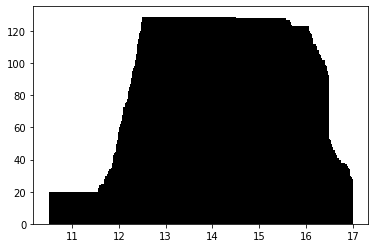

In [3]:
xx1 = []
yy1 = []
zz1 = []
for i in range(100, 2000, 1):
    b = i / 1000
    counts1, bins1, bars1 = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=b), color='black')
    x1 = bins1
    y1 = np.append(counts1, 0)
    popt1, pcov1 = optimize.curve_fit(func, x1, y1, [lam_approx, sf * b])
    hl1 = 1/popt1[0]
    err1 = fit_param_errors(pcov1)[0]
    xx1 = np.append(xx1, b)
    yy1 = np.append(yy1, hl1/1000000)
    zz1 = np.append(zz1, err1)

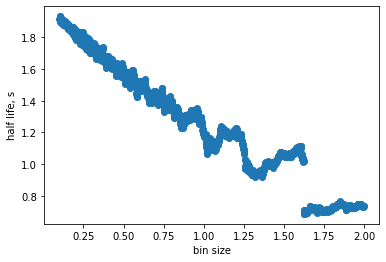

In [4]:
plt.plot(xx1, yy1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('half life, s')
plt.show()

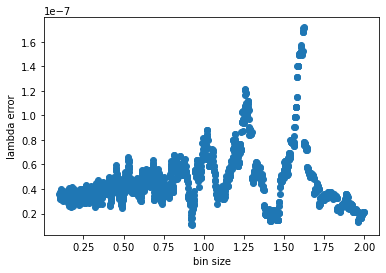

In [5]:
plt.plot(xx1, zz1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('lambda error')
plt.show()